# Project - Toba Toursim
<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">12S4054</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Recommendation System</td>
    </tr>
    <tr>
        <td style="text-align:left">Topik</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>CF (SVD)</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Kelompok</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>10</i></td>
    </tr>
</table>




## Import Libraries and Load Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

# Load dan preprocess data
data = pd.read_csv("drive/MyDrive/Tempat-Wisata-Toba-Preprocessing.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,0,0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.126030e+20,5.0,NaN
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
2,2,2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.078860e+20,5.0,NaN
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k


In [ ]:
data = data.rename(columns={'ReviewerId': 'user_id', 'PlaceID': 'item_id', 'Rating': 'rating'})
data['user_id'] = data['user_id'].astype(str)
data['item_id'] = data['item_id'].astype(str)
data['rating'] = data['rating'].astype(float)
data.dropna(inplace=True)

## Data Splitting


In [ ]:
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print(f"Train data size: {train_data.shape}")
print(f"Validation data size: {validation_data.shape}")
print(f"Test data size: {test_data.shape}")

Train data size: (15516, 9)
Validation data size: (3325, 9)
Test data size: (3325, 9)


In [ ]:
def create_user_item_matrix(data, user_col='user_id', item_col='item_id', rating_col='rating'):
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    return data.pivot(index=user_col, columns=item_col, values=rating_col).fillna(0)

train_matrix = create_user_item_matrix(train_data)
val_matrix = create_user_item_matrix(validation_data).reindex(columns=train_matrix.columns, fill_value=0)
test_matrix = create_user_item_matrix(test_data).reindex(columns=train_matrix.columns,
fill_value=0)

## Create User-Item Matrix

In [ ]:
train_matrix

item_id,0,1,10,100,101,11,12,13,14,15,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
1.00003e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1.00004e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.00009e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
1.00012e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1.00014e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.18443e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1.18444e+20,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.18446e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
val_matrix

item_id,0,1,10,100,101,11,12,13,14,15,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
1.00016e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
1.0001e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1.00027e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
1.00028e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1.00038e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.18428e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.18433e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.18436e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_matrix

item_id,0,1,10,100,101,11,12,13,14,15,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
1.00012e+20,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.00034e+20,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.00037e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.00038e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0003e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.18436e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.18439e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.18441e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


## SVD

In [ ]:
n_factors = 20
svd = TruncatedSVD(n_components=n_factors, random_state=42)
U_train = svd.fit_transform(train_matrix)
U_val = svd.transform(val_matrix)
U_test = svd.transform(test_matrix)
Sigma = svd.components_

train_approx_matrix = np.dot(U_train, Sigma)
val_approx_matrix = np.dot(U_val, Sigma)
test_approx_matrix = np.dot(U_test, Sigma)

## RMSE Calculation Function

In [ ]:
def compute_rmse(true_matrix, approx_matrix):
    return np.sqrt(mean_squared_error(true_matrix, approx_matrix))

In [ ]:
train_rmse = np.sqrt(mean_squared_error(train_matrix.values, train_approx_matrix))
val_rmse = compute_rmse(val_matrix.values, val_approx_matrix)
test_rmse = compute_rmse(test_matrix.values, test_approx_matrix)

In [ ]:
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Training RMSE: 0.3624
Validation RMSE: 0.2974
Test RMSE: 0.2985


## MAE Calculation Function

In [ ]:
def compute_mae(true_matrix, approx_matrix):
    return mean_absolute_error(true_matrix, approx_matrix)

In [ ]:
train_mae = mean_absolute_error(train_matrix.values, train_approx_matrix)
val_mae = compute_mae(val_matrix.values, val_approx_matrix)
test_mae = compute_mae(test_matrix.values, test_approx_matrix)

In [ ]:
print(f"Training MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Training MAE: 0.0565
Validation MAE: 0.0402
Test MAE: 0.0406


## Precision and Recall Calculation

In [ ]:
def compute_precision_recall(true_matrix, approx_matrix, threshold=0.5):
    y_true = (true_matrix >= threshold).astype(int)
    y_pred = (approx_matrix >= threshold).astype(int)

    precision = precision_score(y_true.flatten(), y_pred.flatten())
    recall = recall_score(y_true.flatten(), y_pred.flatten())
    return precision, recall

In [ ]:
val_precision, val_recall = compute_precision_recall(val_matrix.values, val_approx_matrix)
test_precision, test_recall = compute_precision_recall(test_matrix.values, test_approx_matrix)

In [ ]:
print(f"Validation Precision: {val_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")

print(f"Validation Recall: {val_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")

Validation Precision: 0.9141
Test Precision: 0.8976
Validation Recall: 0.6414
Test Recall: 0.6443


## MAP Calculation

In [ ]:
def compute_map(true_matrix, approx_matrix, top_n=5):
    map_score = 0
    num_users = true_matrix.shape[0]

    for user_id in range(num_users):
        true_ratings = true_matrix[user_id]
        approx_ratings = approx_matrix[user_id]

        top_n_indices = np.argsort(approx_ratings)[::-1][:top_n]

        relevant_items = (true_ratings[top_n_indices] >= 3.0)
        precision_at_k = np.mean(relevant_items)

        map_score += precision_at_k

    return map_score / num_users

In [ ]:
val_map = compute_map(val_matrix.values, val_approx_matrix)
test_map = compute_map(test_matrix.values, test_approx_matrix)

In [ ]:
print(f"Validation MAP: {val_map:.4f}")
print(f"Test MAP: {test_map:.4f}")

Validation MAP: 0.1478
Test MAP: 0.1512


In [ ]:
def compute_precision_at_k(true_matrix, approx_matrix, k=5, threshold=3.0):
    precision_at_k = 0
    num_users = true_matrix.shape[0]

    for user_id in range(num_users):
        true_ratings = true_matrix[user_id]
        approx_ratings = approx_matrix[user_id]

        # Get top-k recommendations based on predicted ratings
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]

        # Calculate relevance (whether the rating is >= threshold)
        relevant_items = (true_ratings[top_k_indices] >= threshold)

        precision_at_k += np.mean(relevant_items)

    return precision_at_k / num_users

In [ ]:
val_precision_5 = compute_precision_at_k(val_matrix.values, val_approx_matrix, k=5)
test_precision_5 = compute_precision_at_k(test_matrix.values, test_approx_matrix, k=5)

print(f"Validation Precision@5: {val_precision_5:.4f}")
print(f"Test Precision@5: {test_precision_5:.4f}")

Validation Precision@5: 0.1478
Test Precision@5: 0.1512


In [ ]:
val_precision_10 = compute_precision_at_k(val_matrix.values, val_approx_matrix, k=10)
test_precision_10 = compute_precision_at_k(test_matrix.values, test_approx_matrix, k=10)

print(f"Validation Precision@10: {val_precision_10:.4f}")
print(f"Test Precision@10: {test_precision_10:.4f}")

Validation Precision@10: 0.0811
Test Precision@10: 0.0827


In [ ]:
def compute_recall_at_k(true_matrix, approx_matrix, k=5, threshold=3.0):
    recall_at_k = 0
    num_users = true_matrix.shape[0]

    for user_id in range(num_users):
        true_ratings = true_matrix[user_id]
        approx_ratings = approx_matrix[user_id]

        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        relevant_items = (true_ratings[top_k_indices] >= threshold)

        num_relevant_items = np.sum(true_ratings >= threshold)

        if num_relevant_items == 0:
            continue

        # Calculate recall (relevant items found in top-k / total relevant items)
        recall_at_k += np.sum(relevant_items) / num_relevant_items

    return recall_at_k / num_users

In [ ]:
val_recall_5 = compute_recall_at_k(val_matrix.values, val_approx_matrix, k=5)
test_recall_5 = compute_recall_at_k(test_matrix.values, test_approx_matrix, k=5)

print(f"Validation Recall@5: {val_recall_5:.4f}")
print(f"Test Recall@5: {test_recall_5:.4f}")

Validation Recall@5: 0.6339
Test Recall@5: 0.6482


In [ ]:
val_recall_10 = compute_recall_at_k(val_matrix.values, val_approx_matrix, k=10)
test_recall_10 = compute_recall_at_k(test_matrix.values, test_approx_matrix, k=10)

print(f"Validation Recall@10: {val_recall_10:.4f}")
print(f"Test Recall@10: {test_recall_10:.4f}")

Validation Recall@10: 0.6725
Test Recall@10: 0.6834


In [ ]:
def compute_map_at_k(true_matrix, approx_matrix, k=5, threshold=3.0):
    map_at_k = 0
    num_users = true_matrix.shape[0]

    for user_id in range(num_users):
        true_ratings = true_matrix[user_id]
        approx_ratings = approx_matrix[user_id]

        # Get top-k recommendations based on predicted ratings
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]

        # Calculate precision at each rank position
        relevant_items = (true_ratings[top_k_indices] >= threshold)
        precision_at_k = np.cumsum(relevant_items) / (np.arange(1, k + 1))

        map_at_k += np.mean(precision_at_k)

    return map_at_k / num_users

In [ ]:
val_map_5 = compute_map_at_k(val_matrix.values, val_approx_matrix, k=5)
test_map_5 = compute_map_at_k(test_matrix.values, test_approx_matrix, k=5)

print(f"Validation MAP@5: {val_map_5:.4f}")
print(f"Test MAP@5: {test_map_5:.4f}")

Validation MAP@5: 0.3165
Test MAP@5: 0.3229


In [ ]:
val_map_10 = compute_map_at_k(val_matrix.values, val_approx_matrix, k=10)
test_map_10 = compute_map_at_k(test_matrix.values, test_approx_matrix, k=10)

print(f"Validation MAP@10: {val_map_10:.4f}")
print(f"Test MAP@10: {test_map_10:.4f}")

Validation MAP@10: 0.2077
Test MAP@10: 0.2117


In [ ]:
import matplotlib.pyplot as plt

# Metrik Rating (RMSE, MAE)
rating_metrics = {
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'MAE': [train_mae, val_mae, test_mae]
}

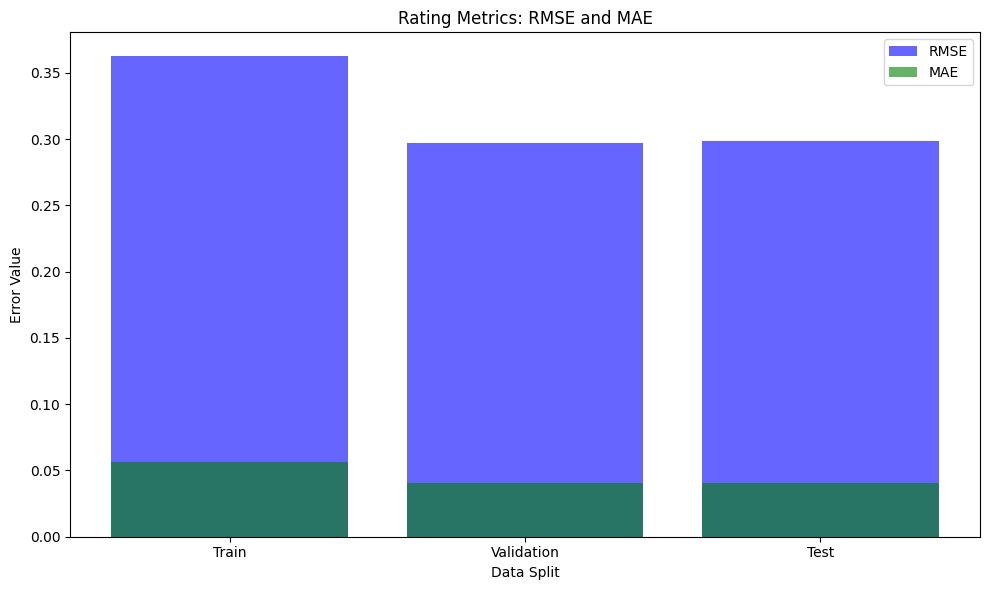

In [ ]:
# Plot untuk Rating Metrics (RMSE, MAE)
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Validation', 'Test'], rating_metrics['RMSE'], color='b', alpha=0.6, label='RMSE')
plt.bar(['Train', 'Validation', 'Test'], rating_metrics['MAE'], color='g', alpha=0.6, label='MAE')
plt.title('Rating Metrics: RMSE and MAE')
plt.xlabel('Data Split')
plt.ylabel('Error Value')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ranking_metrics_5 = {
    'Precision@5': [val_precision_5, test_precision_5],
    'Recall@5': [val_recall_5, test_recall_5],
    'MAP@5': [val_map_5, test_map_5]
}

ranking_metrics_10 = {
    'Precision@10': [val_precision_10, test_precision_10],
    'Recall@10': [val_recall_10, test_recall_10],
    'MAP@10': [val_map_10, test_map_10]
}

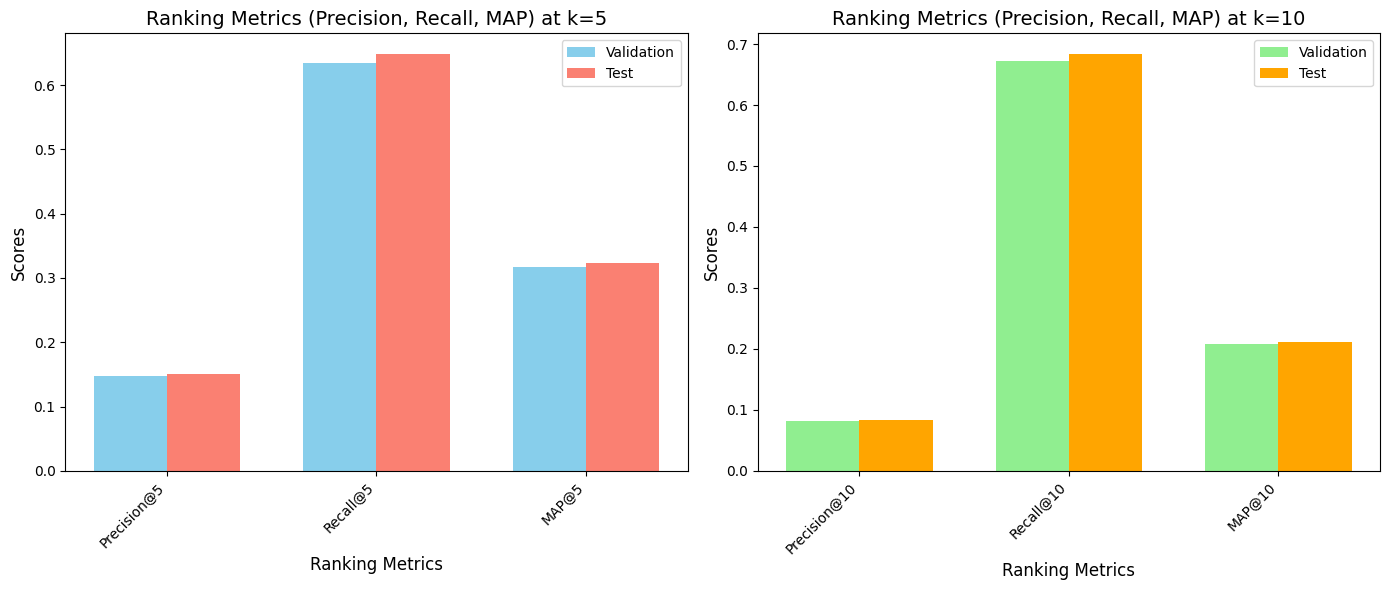

In [ ]:
# Data for plotting for Top-5
metric_names_5 = list(ranking_metrics_5.keys())
metric_values_5 = np.array(list(ranking_metrics_5.values()))

# Data for plotting for Top-10
metric_names_10 = list(ranking_metrics_10.keys())
metric_values_10 = np.array(list(ranking_metrics_10.values()))

# Bar width
bar_width = 0.35
index_5 = np.arange(len(metric_names_5))
index_10 = np.arange(len(metric_names_10))

# Plotting for Top-5
plt.figure(figsize=(14, 6))

# Create bars for Top-5 metrics
plt.subplot(1, 2, 1)
bar1_5 = plt.bar(index_5, metric_values_5[:, 0], bar_width, label='Validation', color='skyblue')
bar2_5 = plt.bar(index_5 + bar_width, metric_values_5[:, 1], bar_width, label='Test', color='salmon')

# Add labels and title for Top-5
plt.xlabel('Ranking Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Ranking Metrics (Precision, Recall, MAP) at k=5', fontsize=14)
plt.xticks(index_5 + bar_width / 2, metric_names_5, rotation=45, ha='right')
plt.legend()

# Plotting for Top-10
plt.subplot(1, 2, 2)
bar1_10 = plt.bar(index_10, metric_values_10[:, 0], bar_width, label='Validation', color='lightgreen')
bar2_10 = plt.bar(index_10 + bar_width, metric_values_10[:, 1], bar_width, label='Test', color='orange')

plt.xlabel('Ranking Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Ranking Metrics (Precision, Recall, MAP) at k=10', fontsize=14)
plt.xticks(index_10 + bar_width / 2, metric_names_10, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Function to recommend top-N places
def get_top_n_recommendations(user_id, approx_matrix, top_n=5):
    # Get predicted ratings for the given user
    user_ratings = approx_matrix[user_id]

    # Get the indices of the top-N recommended items
    top_n_indices = np.argsort(user_ratings)[::-1][:top_n]

    return top_n_indices

# Get Place names and addresses
place_info = data[['item_id', 'Nama_tempat_wisata', 'address']].drop_duplicates()

In [ ]:
# Function to display top-N recommendations with details
def display_recommendations(user_id, approx_matrix, top_n=5):
    top_n_indices = get_top_n_recommendations(user_id, approx_matrix, top_n)

    recommendations = []
    for idx in top_n_indices:
        place_id = train_matrix.columns[idx]  # Get the place id
        place_details = place_info[place_info['item_id'] == place_id].iloc[0]
        place_name = place_details['Nama_tempat_wisata']
        place_address = place_details['address']
        predicted_rating = approx_matrix[user_id, idx]  # Predicted rating

        recommendations.append({
            'Nama_tempat_wisata': place_name,
            'address': place_address,
            'Rating': predicted_rating
        })

    return pd.DataFrame(recommendations)

In [ ]:
top_5_recommendations = display_recommendations(user_id, test_approx_matrix, top_n=5)
top_5_recommendations.head(5)

,Nama_tempat_wisata,address,Rating
0,Danau Toba Parapat,"MWMG+GCG, Jalan Siborong Borong - Parapat, Sib...",5.050207
1,Pasar Tomok,"MV27+R3C, Tomok, Simanindo, Kabupaten Samosir,...",0.187756
2,Air Terjun Efrata,"GJPV+QX4, Sosor Dolok, Kec. Harian, Kabupaten ...",0.176276
3,Menara Pandang Tele,"HJ2Q+RWQ, Turpuk Limbong, Kec. Harian, Kabupat...",0.170060
4,Batu Kursi Raja Siallagan ( Stone Chair of Kin...,"Huta Siallagan Siallagan-Pindaraya, Ambarita, ...",0.169133


In [ ]:
top_10_recommendations = display_recommendations(user_id, test_approx_matrix, top_n=10)
top_10_recommendations.head(10)

,Nama_tempat_wisata,address,Rating
0,Danau Toba Parapat,"MWMG+GCG, Jalan Siborong Borong - Parapat, Sib...",5.050207
1,Pasar Tomok,"MV27+R3C, Tomok, Simanindo, Kabupaten Samosir,...",0.187756
2,Air Terjun Efrata,"GJPV+QX4, Sosor Dolok, Kec. Harian, Kabupaten ...",0.176276
3,Menara Pandang Tele,"HJ2Q+RWQ, Turpuk Limbong, Kec. Harian, Kabupat...",0.170060
4,Batu Kursi Raja Siallagan ( Stone Chair of Kin...,"Huta Siallagan Siallagan-Pindaraya, Ambarita, ...",0.169133
5,Pemandian Bukit Gibeon,"HXPV+4PX, Sionggang Utara, Kec. Lumban Julu, T...",0.144038
6,Bukit Senyum,"JWPC+8C4, Motung, Kec. Ajibata, Toba, Sumatera...",0.125908
7,Pantai Pasir Putih Parbaba,"Parbaba Dolok, Kec. Pangururan, Kabupaten Samo...",0.113809
8,Puncak Huta Ginjang,"8X7C+WCJ, Sitanggor, Kec. Muara, Kabupaten Tap...",0.094580
9,The Kaldera,"Sigapiton, Kec. Ajibata, Toba, Sumatera Utara,...",0.088958
